In [1]:
#data manupulation libraries
import pandas as pd
import numpy as np

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#model building libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,\
VotingClassifier, StackingClassifier

# metrics for model evalution
from sklearn.metrics import confusion_matrix, classification_report, f1_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
income = pd.read_csv('Data_inc.csv')
data = income.copy()

In [3]:
data.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [4]:
data.shape

(32561, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32561 non-null  int64  
 1   Profession Class  32561 non-null  object 
 2   Final_census      32561 non-null  int64  
 3    Education        32561 non-null  object 
 4    Education-num    32561 non-null  int64  
 5    marital-status   32561 non-null  object 
 6    occupation       32561 non-null  object 
 7    relationship     32561 non-null  object 
 8    race             32561 non-null  object 
 9   Gender            32561 non-null  object 
 10   capital-gain     32561 non-null  int64  
 11   capital-loss     32561 non-null  int64  
 12   hours-per-week   32561 non-null  int64  
 13   country          32561 non-null  object 
 14   income           32561 non-null  object 
 15  Unnamed: 15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memor

In [6]:
#droping Unnamed: 15
data.drop('Unnamed: 15', axis =1, inplace= True)

In [7]:
#checking null values
data.isna().sum()

Age                 0
Profession Class    0
Final_census        0
 Education          0
 Education-num      0
 marital-status     0
 occupation         0
 relationship       0
 race               0
Gender              0
 capital-gain       0
 capital-loss       0
 hours-per-week     0
 country            0
 income             0
dtype: int64

In [8]:
#Some column name having space charecter in the front. We will remove the space
clean_col = [col.strip() for col in data.columns]
columns = dict(zip(data.columns, clean_col))
data.rename(columns=columns, inplace= True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession Class  32561 non-null  object
 2   Final_census      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education-num     32561 non-null  int64 
 5   marital-status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   Gender            32561 non-null  object
 10  capital-gain      32561 non-null  int64 
 11  capital-loss      32561 non-null  int64 
 12  hours-per-week    32561 non-null  int64 
 13  country           32561 non-null  object
 14  income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
#chcking unique values in object columns

cat_col = [col for col in data.columns if data[col].dtype == np.object_]
for col in cat_col:
    print(f"{col}: Unquie value: {data[col].nunique()}")
    print("=="*30)
    print(data[col].unique())
    print("=="*30)

Profession Class: Unquie value: 9
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Education: Unquie value: 16
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status: Unquie value: 7
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation: Unquie value: 15
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship: Unquie value: 6
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race: Unquie value: 5
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-

- Basis above noted that some columns having '?' we need to replace the same as NaN and later fill the NaN
- most of the data having additional space infort of the word. We need to clean the data.

In [11]:
for col in cat_col:
    data[col] = data[col].apply(lambda x: x.strip())

In [12]:
#chcking unique values in object columns

cat_col = [col for col in data.columns if data[col].dtype == np.object_]
for col in cat_col:
    print(f"{col}: Unquie value: {data[col].nunique()}")
    print("=="*30)
    print(data[col].unique())
    print("=="*30)

Profession Class: Unquie value: 9
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Education: Unquie value: 16
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status: Unquie value: 7
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation: Unquie value: 15
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship: Unquie value: 6
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race: Unquie value: 5
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
Gender: Unquie value: 2
['Male' 'F

In [13]:
#replacing ? with NaN

data.replace('?', np.NaN,inplace= True)

In [14]:
#checking the null value
null_check_df = pd.DataFrame()
null_check_df.index = data.isnull().sum().index
null_check_df['null_value'] = data.isnull().sum().values
null_check_df['percentage'] = null_check_df['null_value']/len(data)

In [15]:
null_check_df

,null_value,percentage
Age,0,0.000000
Profession Class,1836,0.056386
Final_census,0,0.000000
Education,0,0.000000
Education-num,0,0.000000
marital-status,0,0.000000
occupation,1843,0.056601
relationship,0,0.000000
race,0,0.000000
Gender,0,0.000000


- We will copute the null values

In [16]:
data['Profession Class'].fillna(data['Profession Class'].mode()[0], inplace= True)
data['occupation'].fillna(data['occupation'].mode()[0], inplace= True)
data['country'].fillna(data['country'].mode()[0], inplace= True)

In [17]:
data.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
data.duplicated().sum() #checking duplicate rows

24

In [19]:
#drop duplicate rows
data.drop_duplicates(inplace= True)

## EDA

In [20]:
#checking num columns
num_col = [col for col in data.columns if data[col].dtype != np.object_]

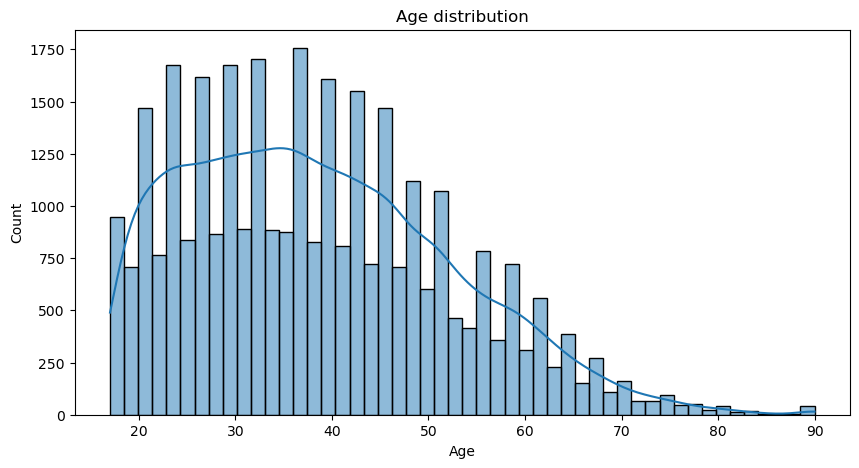

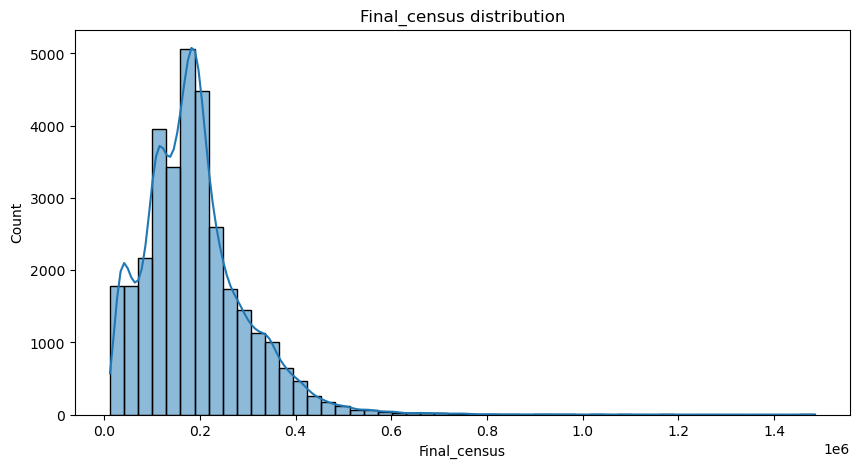

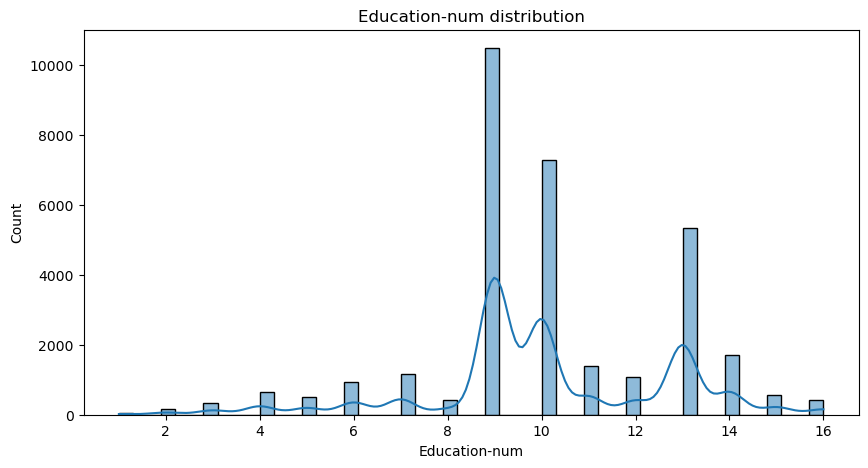

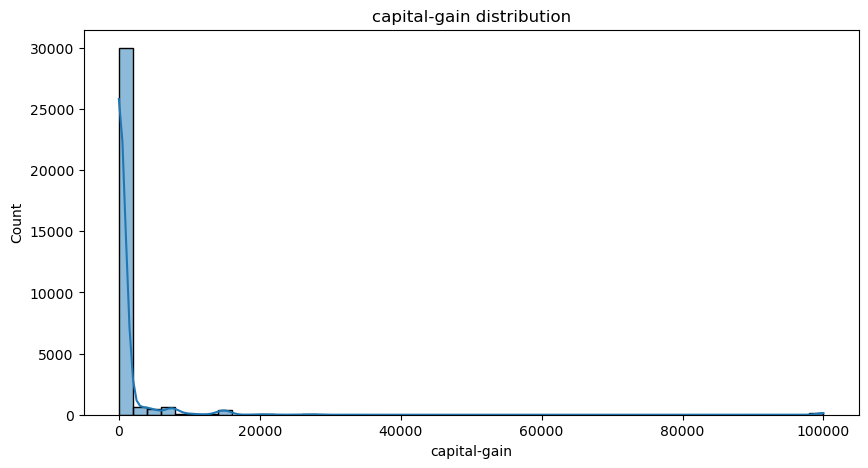

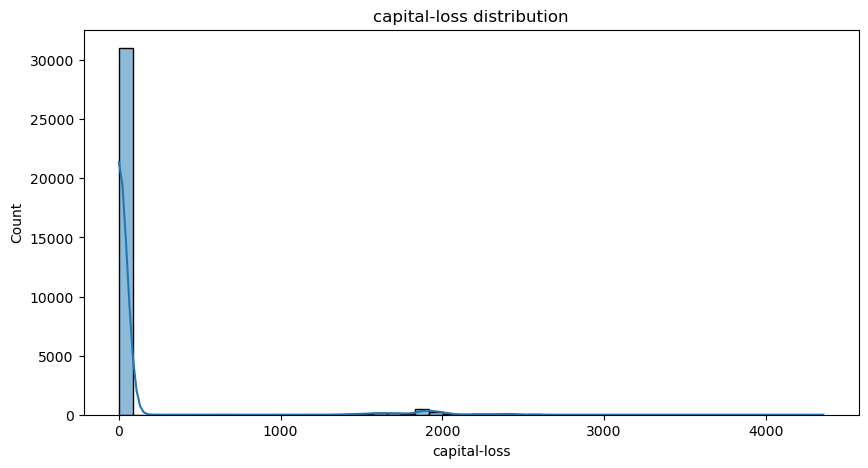

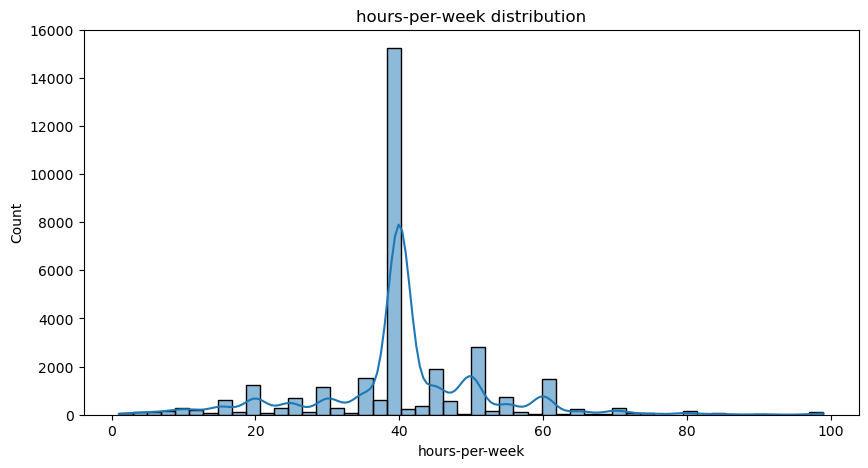

In [21]:
for col in num_col:
    plt.figure(figsize=(10,5))
    sns.histplot(data[col], bins= 50, kde= True)
    plt.title(f"{col} distribution")
plt.show()

- Capital-gain and capital-loss columns are mostly zeros. We will handle the data seperatly

In [22]:
# education_num column to drop
try:
    data.drop('Education-num', axis = 1, inplace= True)
    num_col.remove('Education-num')
except Exception as e:
    print('Education-num already removed')

In [23]:
num_col

['Age', 'Final_census', 'capital-gain', 'capital-loss', 'hours-per-week']

In [24]:
from scipy.stats import yeojohnson
for col in num_col:
    x = yeojohnson(data[col])
    data[col] = x[0]


In [25]:
data.describe()

,Age,Final_census,capital-gain,capital-loss,hours-per-week
count,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,4.874320,372.923165,0.061286,0.016366,40.484493
std,0.613373,90.939727,0.203241,0.073957,12.364140
min,3.649228,121.365721,-0.000000,-0.000000,1.000147
25%,4.425205,317.028243,0.000000,0.000000,40.042785
50%,4.891213,377.687650,0.000000,0.000000,40.042785
75%,5.347780,425.811673,0.000000,0.000000,45.049974
max,6.537968,922.065179,0.735281,0.350563,99.137808


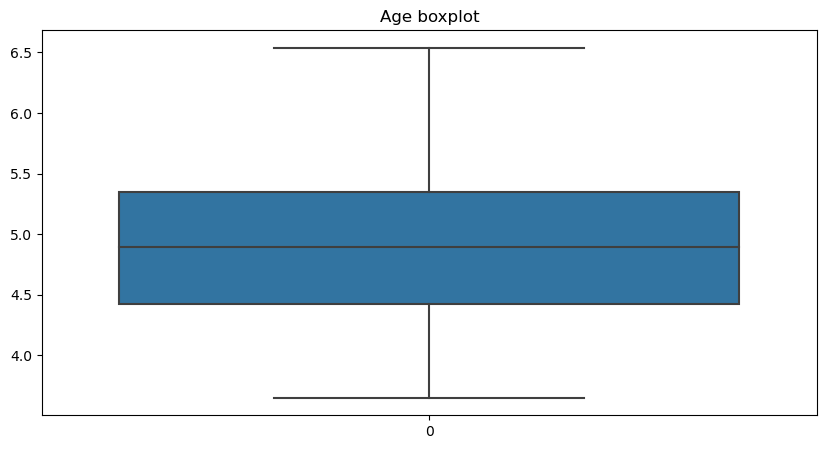

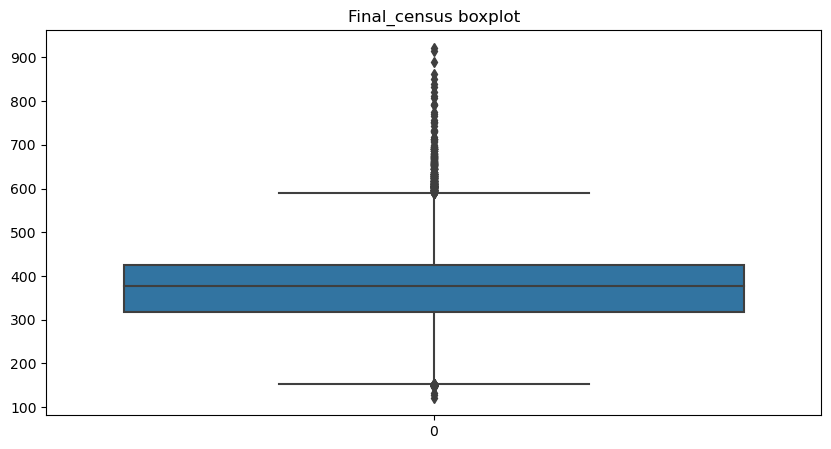

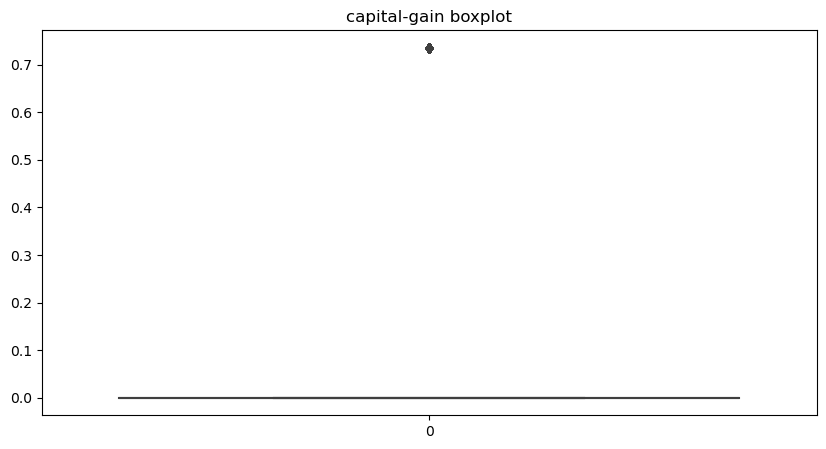

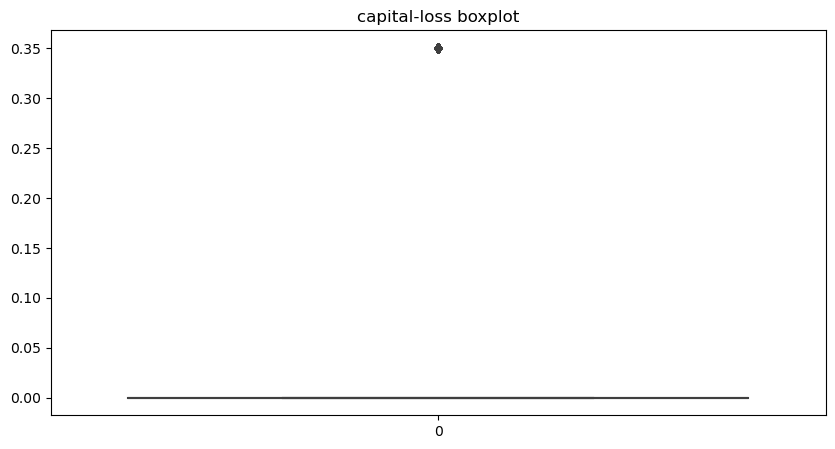

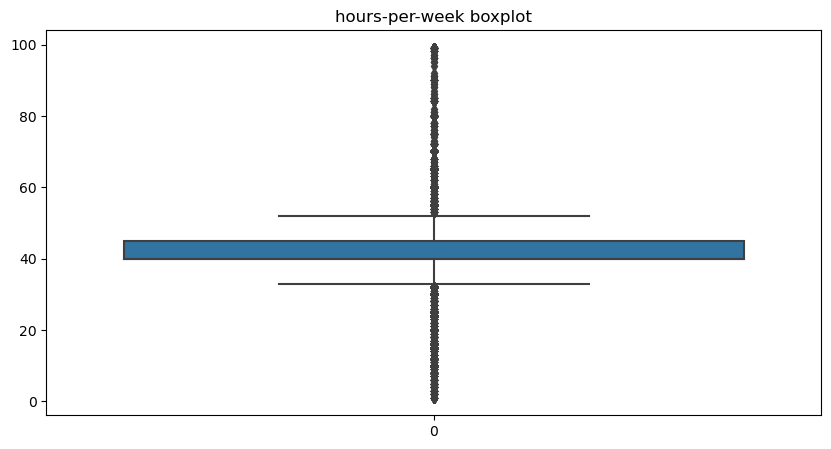

In [26]:
#checking the outliers
for col in num_col:
    plt.figure(figsize=(10,5))
    sns.boxplot(data[col])
    plt.title(f"{col} boxplot")
plt.show()

In [27]:
def check_outliers(df, Range = 1.5):
    """
    FUnction will check the Outliers in the dataframe and return
    upper and lower limit
    """
    Q1 = df.quantile(.25,numeric_only = True)
    Q3 = df.quantile(.75, numeric_only = True)
    IQR = Q3 - Q1
    pos_outliers = Q3 + IQR*Range
    neg_outliers = Q1 - IQR*Range
    return pos_outliers, neg_outliers

In [28]:
num_col.remove('capital-loss')
num_col.remove('capital-gain')
upper, lower = check_outliers(data[num_col])

In [29]:
lower

Age                 3.041343
Final_census      153.853097
hours-per-week     32.532000
dtype: float64

In [30]:
num_df = data[num_col]
df1 = num_df[~((num_df< lower) | (num_df > upper)).any(axis = 1)]

In [31]:
print(f'If we delete the outliers rows removed: {num_df.shape[0]}')

If we delete the outliers rows removed: 32537


In [32]:
#capping the data
num_data = np.where(num_df <= lower, lower, np.where(num_df>=upper,upper, num_df))
num_df = pd.DataFrame(num_data, columns= num_df.columns)

In [33]:
num_df[num_df['Age'].isna()]

,Age,Final_census,hours-per-week


In [34]:
num_df.shape

(32537, 3)

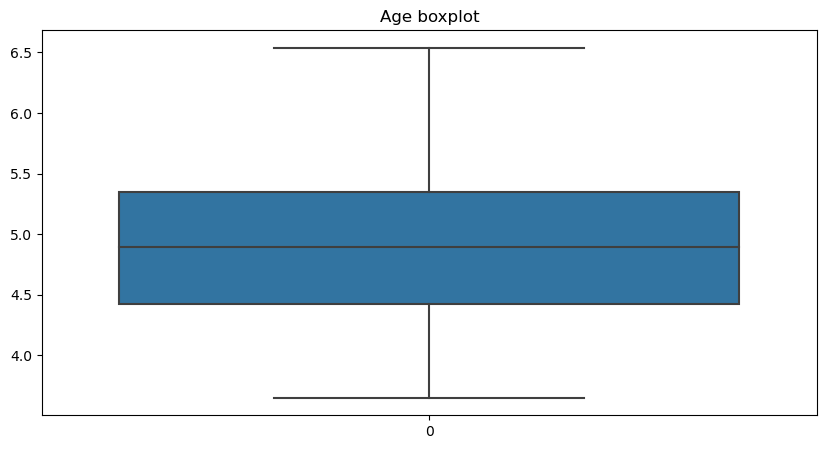

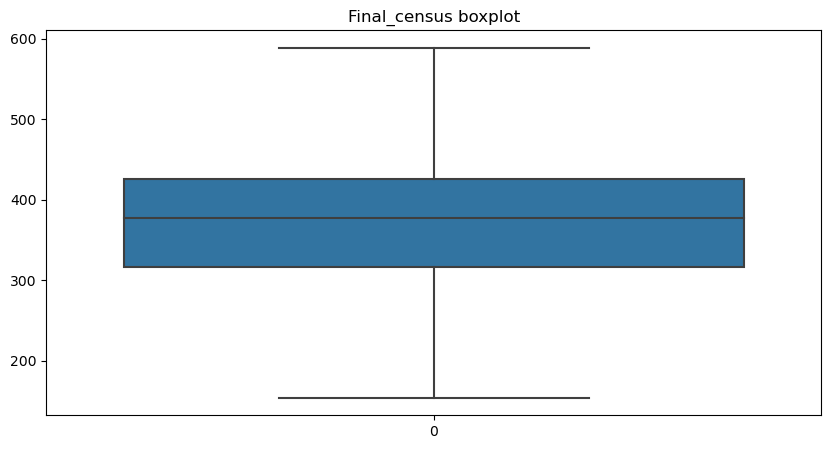

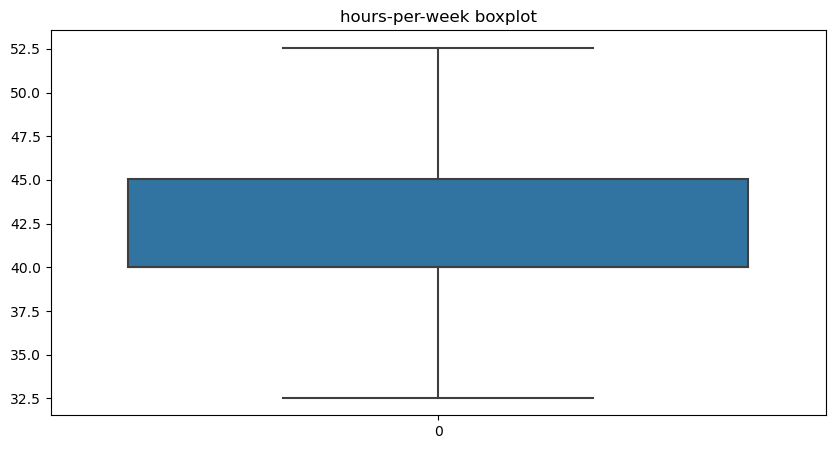

In [35]:
for col in num_col:
    plt.figure(figsize=(10,5))
    sns.boxplot(num_df[col])
    plt.title(f"{col} boxplot")
plt.show()

In [36]:
# CHecking number of Zeros in Capital Gain and Capital Loss Columns
print(f"Percentage of Zeros in capital Gain: {(data[data['capital-gain'] == 0].shape[0] / data.shape[0]*100)}")
print(f"Percentage of Zeros in capital Loss: {(data[data['capital-loss'] == 0].shape[0] / data.shape[0]*100)}")

Percentage of Zeros in capital Gain: 91.66487383594063
Percentage of Zeros in capital Loss: 95.33146878937825


- Most of the values are zero.
- Better to remove the columns

In [37]:
#removing 'capital-gain', 'capital-loss'
data.drop(['capital-gain', 'capital-loss'], axis = 1, inplace = True)

In [38]:
for col in num_col:
    data[col] = num_df[col]

In [39]:
num_df.isna().sum()

Age               0
Final_census      0
hours-per-week    0
dtype: int64

In [40]:
for col in num_col:
    data[col] = data[col].fillna(data[col].mean())

In [41]:
data.isna().sum()

Age                 0
Profession Class    0
Final_census        0
Education           0
marital-status      0
occupation          0
relationship        0
race                0
Gender              0
hours-per-week      0
country             0
income              0
dtype: int64

In [42]:
data.head()

,Age,Profession Class,Final_census,Education,marital-status,occupation,relationship,race,Gender,hours-per-week,country,income
0,4.981881,State-gov,265.581273,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40.042785,United-States,<=50K
1,5.421281,Self-emp-not-inc,273.807913,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,32.532000,United-States,<=50K
2,4.937038,Private,409.190453,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.042785,United-States,<=50K
3,5.527095,Private,424.085119,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.042785,United-States,<=50K
4,4.425205,Private,494.814392,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.042785,Cuba,<=50K


In [43]:
# Checking the 'Profession Class'
data['Profession Class'].value_counts()

Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Profession Class, dtype: int64

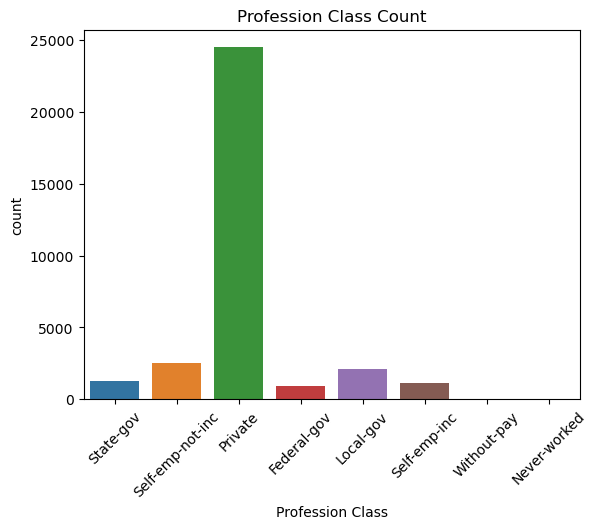

In [44]:
sns.countplot(x= 'Profession Class', data= data)
plt.title("Profession Class Count")
plt.xticks(rotation = 45)
plt.show()

- Basis above it is noted that very minimum data for Without-pay and Never-worked as 'other'
- To reduce the categories we can club 'State-gov', 'Federal-gov', 'Local-gov' as 'govt-emp
- 'Self-emp-not-inc' and 'Self-emp-inc' can be made as 'self_emp'

In [45]:
def prof_category(x):
    if ((x == 'Without-pay') or (x == 'Never-worked')):
        return 'other'
    elif ((x == 'State-gov') or (x == 'Federal-gov') or (x == 'Local-gov')):
        return 'govt-emp'
    elif ((x == 'Self-emp-not-inc') or (x == 'Self-emp-inc')):
        return 'self_emp'
    else:
        return x

In [46]:
data['Profession Class'] = data['Profession Class'].apply(lambda x: prof_category(x))

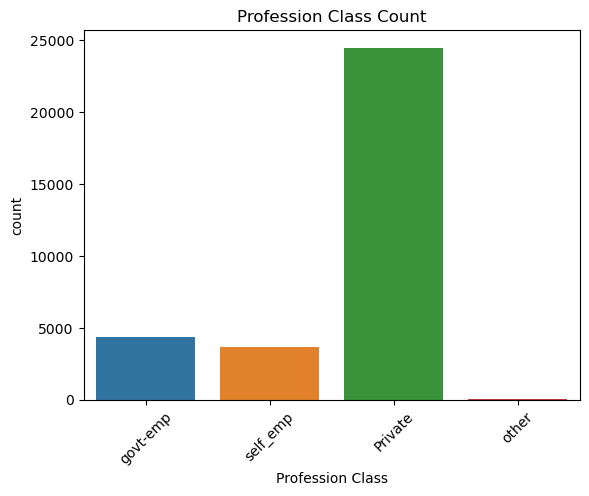

In [47]:
sns.countplot(x= 'Profession Class', data= data)
plt.title("Profession Class Count")
plt.xticks(rotation = 45)
plt.show()

In [48]:
data.head()

,Age,Profession Class,Final_census,Education,marital-status,occupation,relationship,race,Gender,hours-per-week,country,income
0,4.981881,govt-emp,265.581273,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40.042785,United-States,<=50K
1,5.421281,self_emp,273.807913,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,32.532000,United-States,<=50K
2,4.937038,Private,409.190453,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.042785,United-States,<=50K
3,5.527095,Private,424.085119,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.042785,United-States,<=50K
4,4.425205,Private,494.814392,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.042785,Cuba,<=50K


## Checking Education column

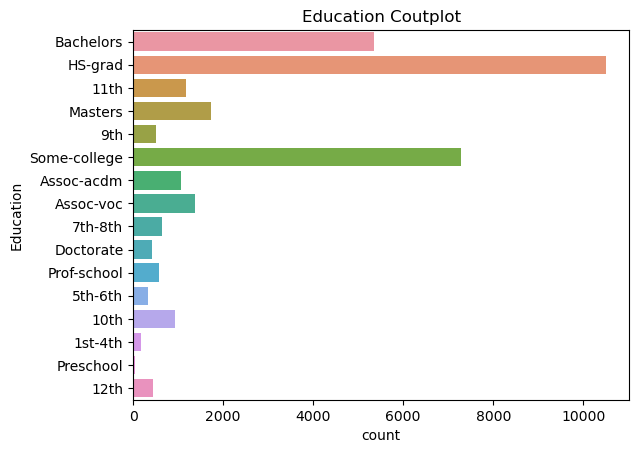

In [49]:
#countplot on Education
sns.countplot(y = 'Education', data = data)
plt.title("Education Coutplot")
plt.show()

- Preschool do not have much data
- We can make sub group till 10th, till HS-grad, till colleage

In [50]:
def education(x):
    if ((x == 'Preschool') or (x == '1st-4th') or (x == '5th-6th') or (x == '7th-8th') or (x == '9th') or (x == '10th')):
        return 'till 10th'
    elif ((x =='11th') or (x == 'HS-grad') or (x == '12th')):
        return 'till 12th'
    elif ((x == 'Bachelors') or (x == 'Some-college')):
        return 'till college'
    else:
        return x

In [51]:
data['Education'] = data['Education'].apply(lambda x: education(x))

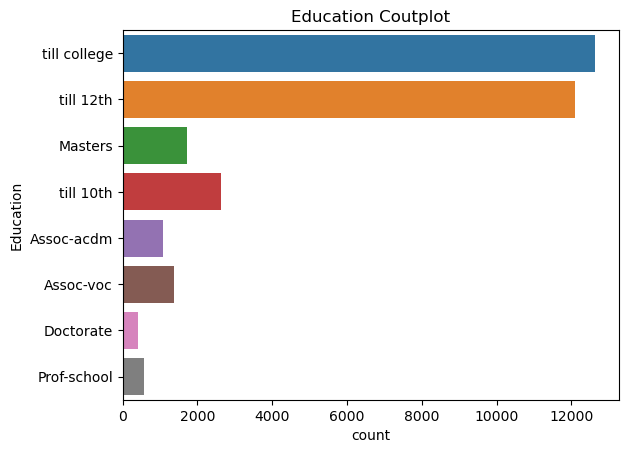

In [52]:
#countplot on Education
sns.countplot(y = 'Education', data = data)
plt.title("Education Coutplot")
plt.show()

## Checking 'marital-status'

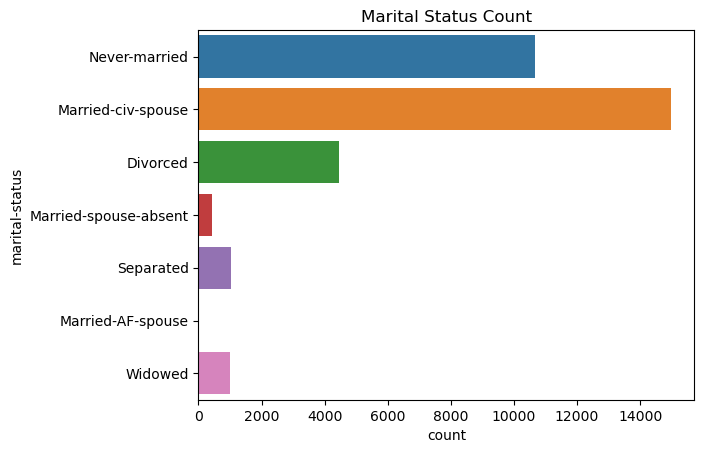

In [53]:
sns.countplot(y = 'marital-status', data = data)
plt.title("Marital Status Count")
plt.show()

- Married AF spouse and Married-civ-spouse, Married-spouse-absent can be clubed as Married.

In [54]:
def married(x):
    if ((x == 'Married-civ-spouse') or (x == 'Married-spouse-absent') or (x == 'Married-AF-spouse')):
        return 'married'
    elif x == 'Never-married':
        return 'unmarried'
    else:
        return x

In [55]:
data['marital-status'] = data['marital-status'].apply(lambda x: married(x))

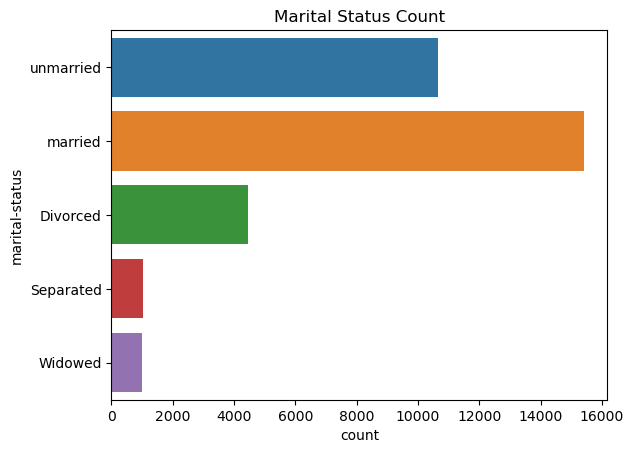

In [56]:
sns.countplot(y = 'marital-status', data = data)
plt.title("Marital Status Count")
plt.show()

In [57]:
data['marital-status'].value_counts()

married      15411
unmarried    10667
Divorced      4441
Separated     1025
Widowed        993
Name: marital-status, dtype: int64

## Checking occupation

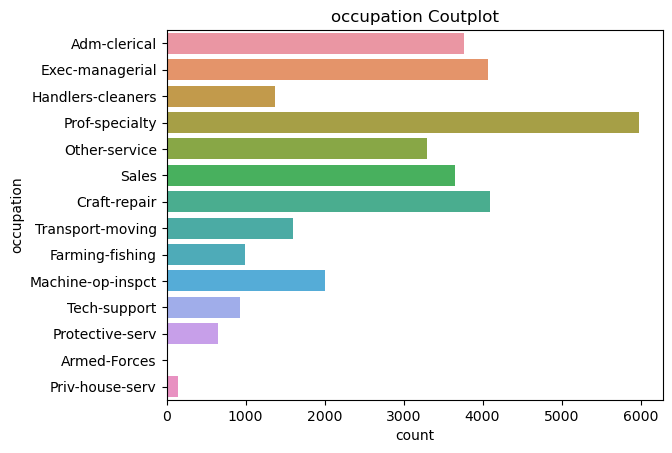

In [58]:
#countplot on Education
sns.countplot(y = 'occupation', data = data)
plt.title("occupation Coutplot")
plt.show()

## Checking releationship

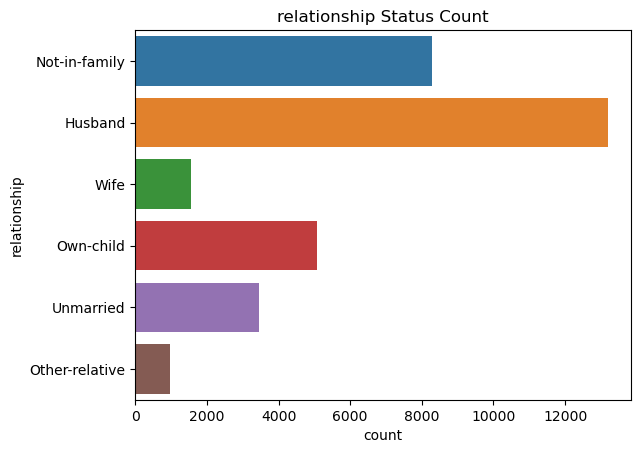

In [59]:
sns.countplot(y = 'relationship', data = data)
plt.title("relationship Status Count")
plt.show()

## Checkin race

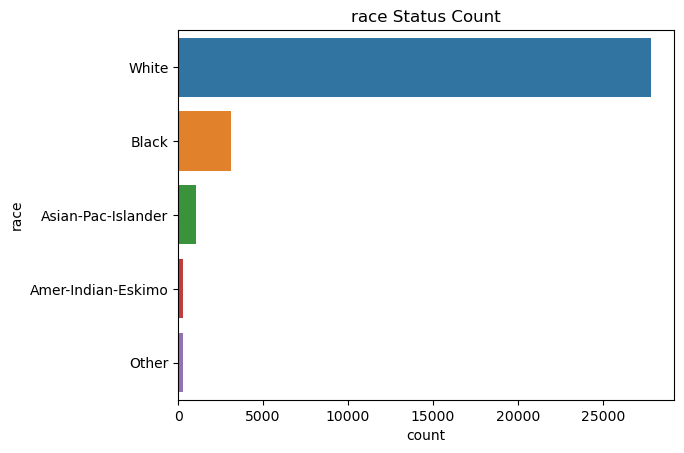

In [60]:
sns.countplot(y = 'race', data = data)
plt.title("race Status Count")
plt.show()

- Asian Pac Islander, Amer Indian Eskimo and other having very less data.
- We will make one category as other

In [61]:
def race(x):
    if ((x == 'Asian-Pac-Islander') or (x == 'Amer-Indian-Eskimo') or (x == 'Other')):
        return 'other'
    else:
        return x

In [62]:
data['race'] = data['race'].apply(lambda x: race(x))

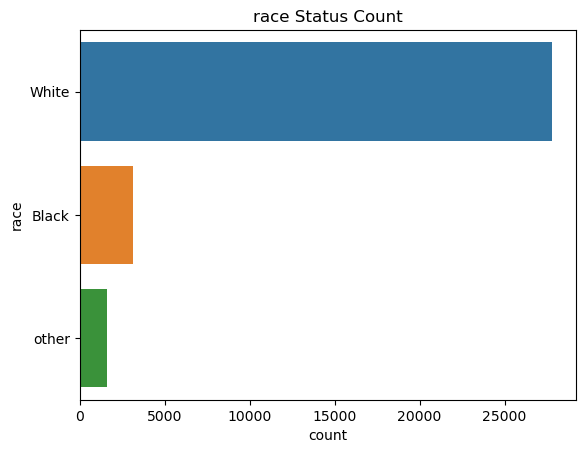

In [63]:
sns.countplot(y = 'race', data = data)
plt.title("race Status Count")
plt.show()

## Checking Gender

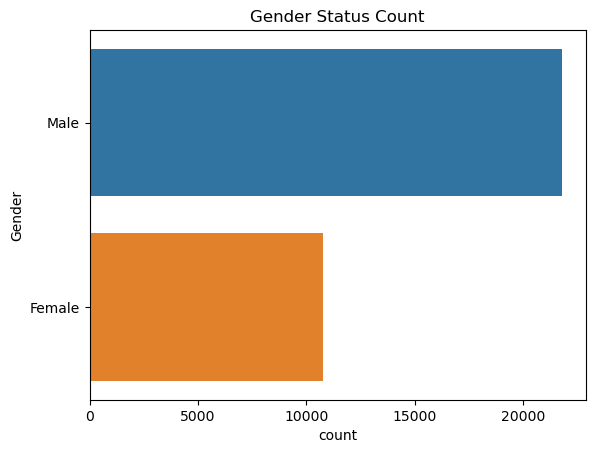

In [64]:
sns.countplot(y = 'Gender', data = data)
plt.title("Gender Status Count")
plt.show()

## Checking country

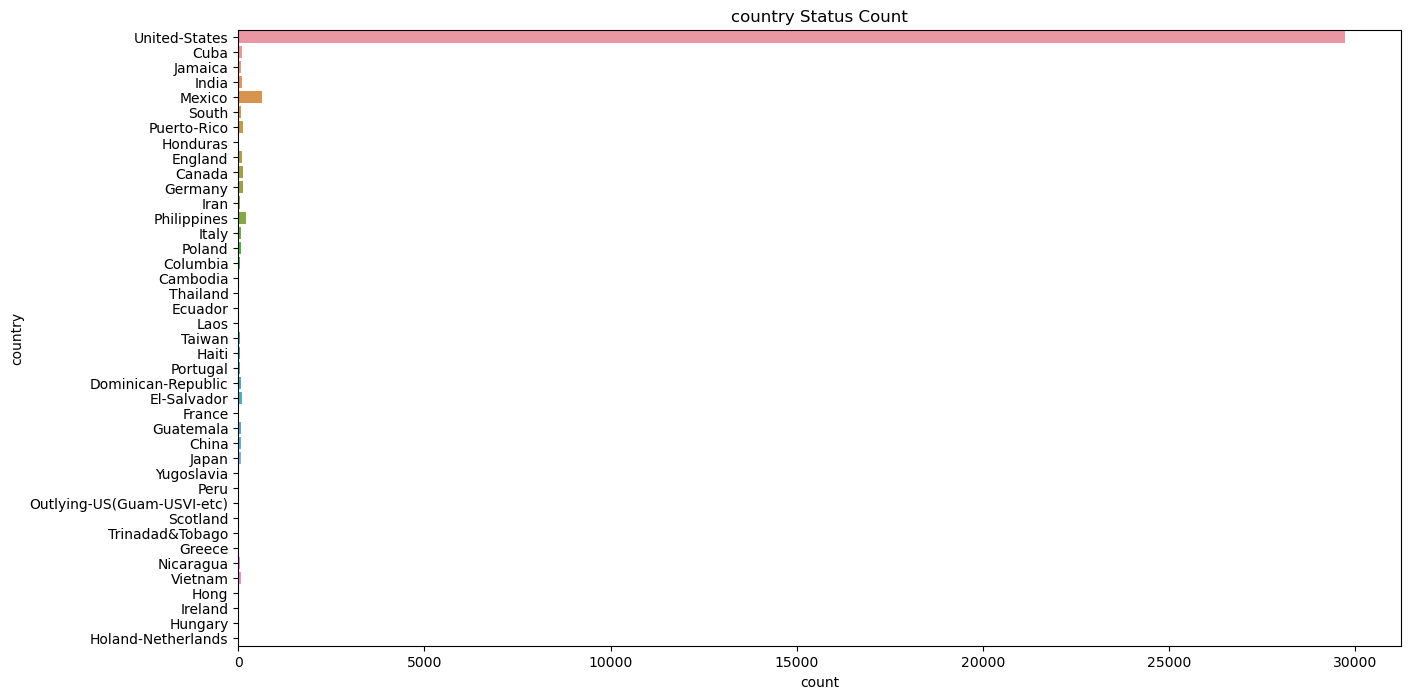

In [65]:
plt.figure(figsize=(15,8))
sns.countplot(y = 'country', data = data)
plt.title("country Status Count")
plt.show()

In [66]:
data['country'].value_counts()

United-States                 29735
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [67]:
def country(x):
    if ((x != 'United-States') or (x != 'Mexico') or (x != 'Philippines') or (x != Germany) or (x!= 'Canada') or
       (x != Puerto-Rico) or (x != 'El-Salvador') or (x != 'India')):
        return 'other'
    else:
        return x

In [68]:
data['country'] = data['country'].apply(lambda x: country(x))

## Checking income column

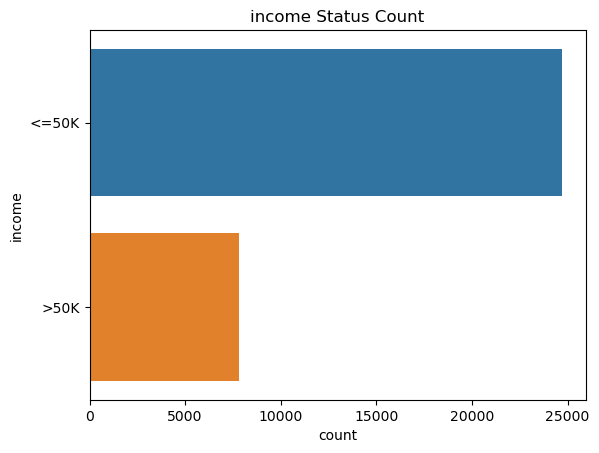

In [69]:
sns.countplot(y = 'income', data = data)
plt.title("income Status Count")
plt.show()

In [70]:
# coverting the columns in 0 == <=50k and 1 == >50k
data['income'] = data['income'].map({'<=50K' : 0,
                   '>50K' : 1})

In [71]:
data['income'].value_counts(normalize= True)

0    0.759074
1    0.240926
Name: income, dtype: float64

## X and Y splitting

In [72]:
X = data.drop('income', axis = 1)
Y = data['income']

In [73]:
data[data['Age'].isna()]

,Age,Profession Class,Final_census,Education,marital-status,occupation,relationship,race,Gender,hours-per-week,country,income


## Encoding and standardization

In [74]:
cat_col.remove('income')

In [75]:
X = pd.get_dummies(X, columns= cat_col, drop_first= 1)

In [76]:
num_col

['Age', 'Final_census', 'hours-per-week']

In [77]:
scale = StandardScaler()

num_data = scale.fit_transform(num_df)
num_df = pd.DataFrame(num_data, columns = num_col)

In [78]:
num_df.shape

(32537, 3)

In [79]:
X.shape

(32537, 38)

In [80]:
for col in num_col:
    X[col] = num_df[col]

In [81]:
X.isna().sum()

Age                             24
Final_census                    24
hours-per-week                  24
Profession Class_govt-emp        0
Profession Class_other           0
Profession Class_self_emp        0
Education_Assoc-voc              0
Education_Doctorate              0
Education_Masters                0
Education_Prof-school            0
Education_till 10th              0
Education_till 12th              0
Education_till college           0
marital-status_Separated         0
marital-status_Widowed           0
marital-status_married           0
marital-status_unmarried         0
occupation_Armed-Forces          0
occupation_Craft-repair          0
occupation_Exec-managerial       0
occupation_Farming-fishing       0
occupation_Handlers-cleaners     0
occupation_Machine-op-inspct     0
occupation_Other-service         0
occupation_Priv-house-serv       0
occupation_Prof-specialty        0
occupation_Protective-serv       0
occupation_Sales                 0
occupation_Tech-supp

In [82]:
for col in num_col:
    X[col] = X[col].fillna(data[col].mean())

In [83]:
X.head()

,Age,Final_census,hours-per-week,Profession Class_govt-emp,Profession Class_other,Profession Class_self_emp,Education_Assoc-voc,Education_Doctorate,Education_Masters,Education_Prof-school,...,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,race_other,Gender_Male
0,0.175361,-1.195912,-0.194476,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,0.891740,-1.103815,-1.406642,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0.102251,0.411782,-0.194476,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,1.064254,0.578527,-0.194476,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.732217,1.370336,-0.194476,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Checking coreleation matrix

In [84]:
cor_mat = X.corr()

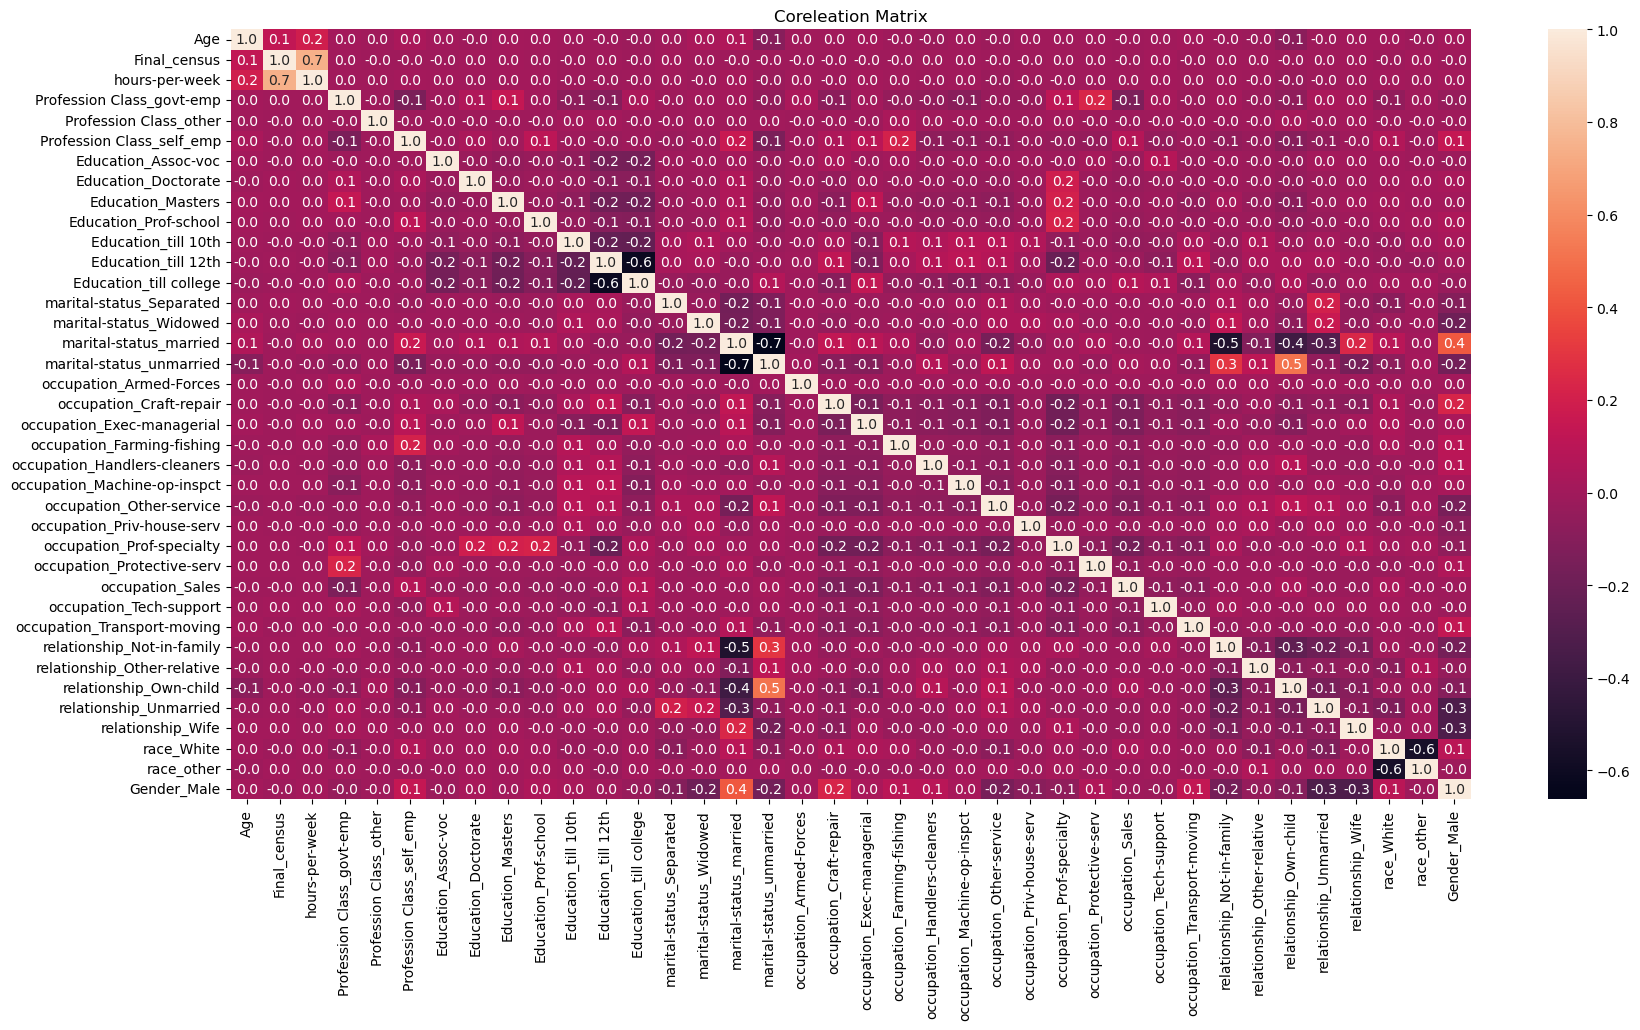

In [85]:
plt.figure(figsize=(20,10))
sns.heatmap(cor_mat, annot= True, fmt = '.1f')
plt.title("Coreleation Matrix")
plt.show()

In [86]:
#checking coreleation with income
temp_df = pd.concat([X,Y], axis = 1)

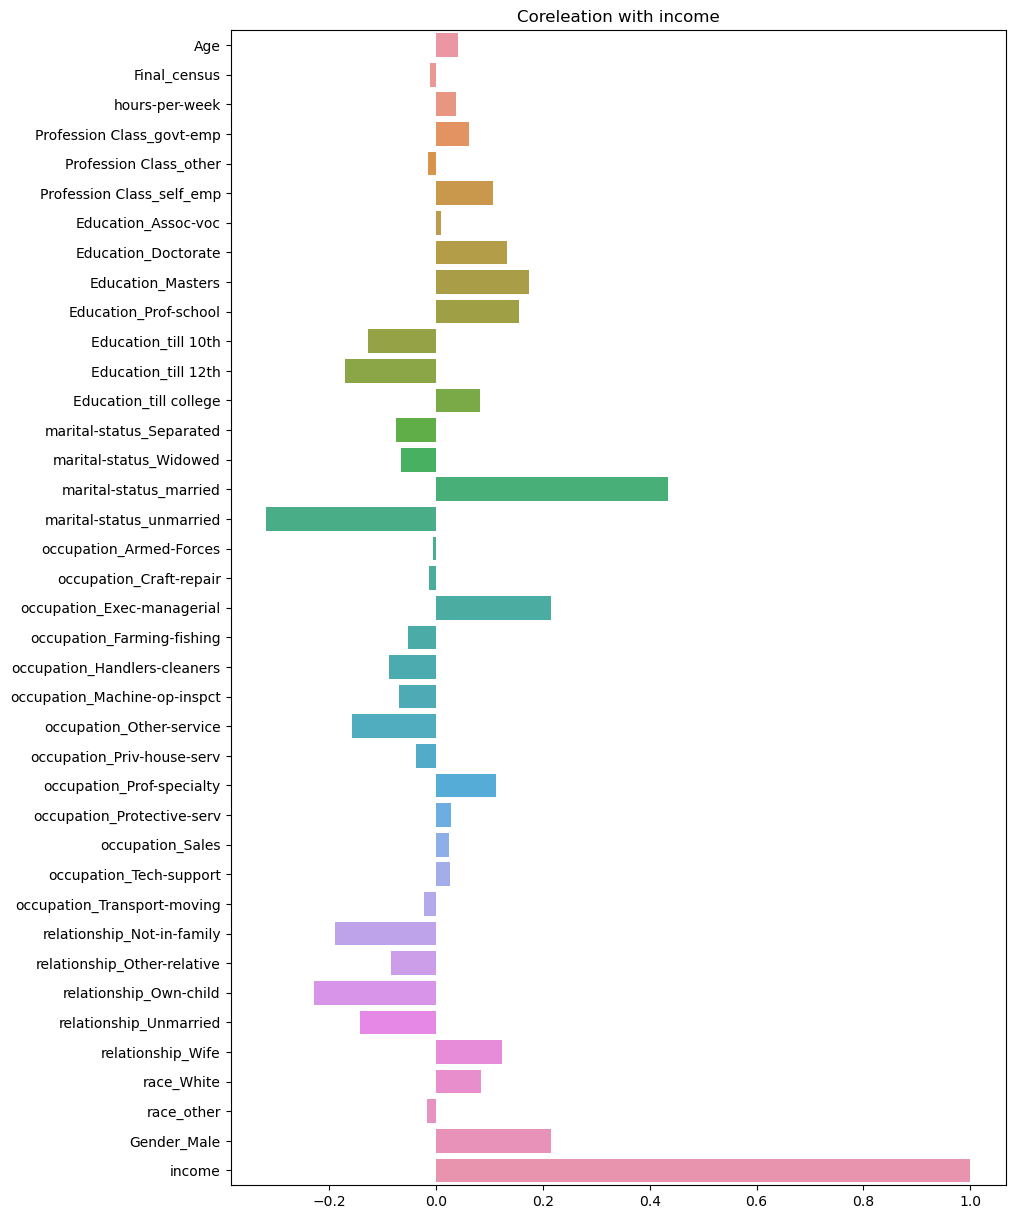

In [87]:
plt.figure(figsize = (10,15))
corwith_income = temp_df.corrwith(temp_df['income'],method='spearman')
sns.barplot(x = corwith_income.values,
           y= corwith_income.index)
# plt.xticks(rotation = 90)
plt.title("Coreleation with income")
plt.show()

In [88]:
corwith_income[corwith_income.index == 'country_Hungary']

Series([], dtype: float64)

- There is very low releationship of Country_Hungary and Country_Scotland.

In [89]:
X.isna().sum()

Age                             0
Final_census                    0
hours-per-week                  0
Profession Class_govt-emp       0
Profession Class_other          0
Profession Class_self_emp       0
Education_Assoc-voc             0
Education_Doctorate             0
Education_Masters               0
Education_Prof-school           0
Education_till 10th             0
Education_till 12th             0
Education_till college          0
marital-status_Separated        0
marital-status_Widowed          0
marital-status_married          0
marital-status_unmarried        0
occupation_Armed-Forces         0
occupation_Craft-repair         0
occupation_Exec-managerial      0
occupation_Farming-fishing      0
occupation_Handlers-cleaners    0
occupation_Machine-op-inspct    0
occupation_Other-service        0
occupation_Priv-house-serv      0
occupation_Prof-specialty       0
occupation_Protective-serv      0
occupation_Sales                0
occupation_Tech-support         0
occupation_Tra

In [90]:
#checking VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = X.copy()
df = sm.add_constant(df)
VIF = pd.DataFrame()
vif = [variance_inflation_factor(df,i) for i in range(df.shape[1])][1:]
VIF.index = df.columns[1:]
VIF['data'] = vif

In [91]:
VIF[VIF['data'] >5]

,data
Education_till 12th,7.920091
Education_till college,7.894292
marital-status_married,14.893393
relationship_Not-in-family,11.061059
relationship_Own-child,8.158007
relationship_Unmarried,6.320605


## Model building

In [92]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size= .8, random_state= 42, stratify= Y)

In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26029, 38)
(6508, 38)
(26029,)
(6508,)


In [94]:
lr_clf = LogisticRegression(random_state= 42)
knn_clf = KNeighborsClassifier(n_neighbors=20,)
nb_clf = GaussianNB()
dt_clf = DecisionTreeClassifier(random_state= 42)
rf_clf = RandomForestClassifier(random_state= 42)

models = [lr_clf, knn_clf, nb_clf, dt_clf, rf_clf]

In [95]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
def model_predict(X1, X2, y1,y2, models):
    scores = []
    train_model = []
    for model in models:
        model.fit(X1,y1)
        y_pred = model.predict(X2)
        score = accuracy_score(y2, y_pred)
        scores.append(score)
        train_model.append(model)
    return scores, train_model

In [96]:
score, trained_model = model_predict(X_train, X_test, y_train, y_test, models)

C:\Users\sayan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


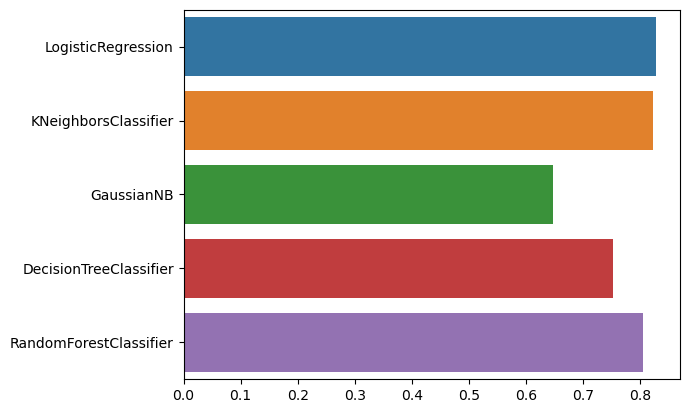

In [97]:
sns.barplot(x=score, y=[str(model).split('(')[0] for model in models])
print()

In [98]:
for model in trained_model:
    y_pred = model.predict(X_test)
    print(str(model))
    print("=="*30)
    print(classification_report(y_test, y_pred))
    print(f"f1_score: {f1_score(y_test, y_pred)}")
    print("=="*30)

LogisticRegression(random_state=42)
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4940
           1       0.67      0.57      0.61      1568

    accuracy                           0.83      6508
   macro avg       0.77      0.74      0.75      6508
weighted avg       0.82      0.83      0.82      6508

f1_score: 0.6145905024088093
KNeighborsClassifier(n_neighbors=20)
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4940
           1       0.67      0.53      0.59      1568

    accuracy                           0.82      6508
   macro avg       0.76      0.72      0.74      6508
weighted avg       0.81      0.82      0.82      6508

f1_score: 0.5906993255236066
GaussianNB()
              precision    recall  f1-score   support

           0       0.96      0.56      0.71      4940
           1       0.40      0.92      0.56      1568

    accuracy                          

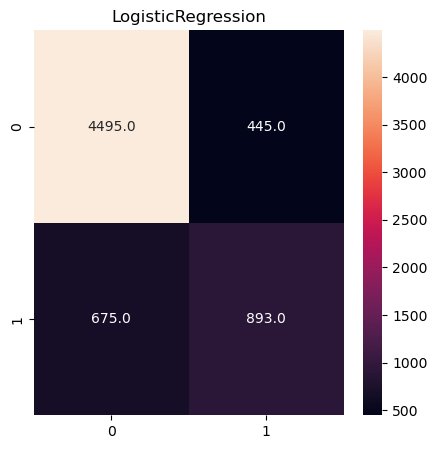

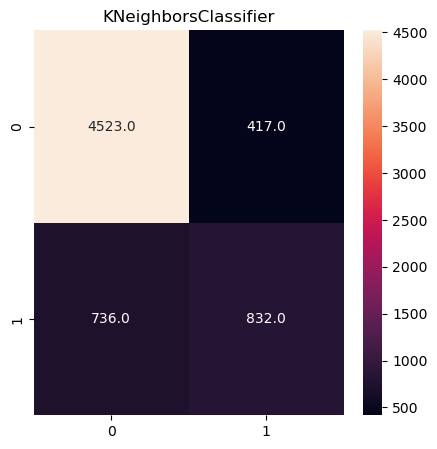

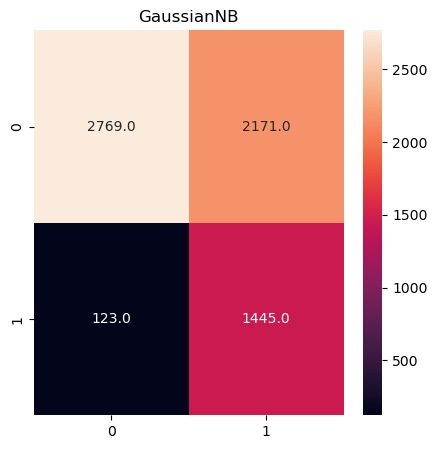

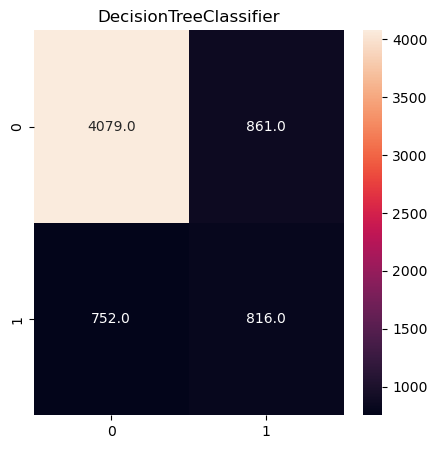

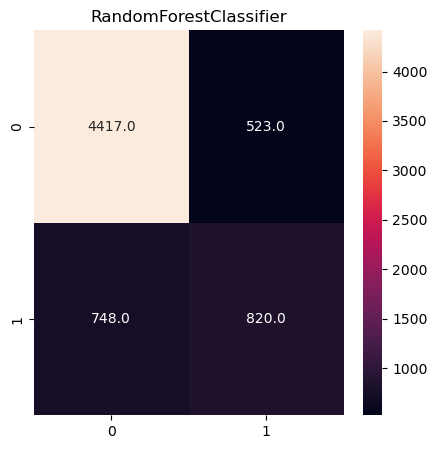

In [99]:
for model in trained_model:
    plt.figure(figsize=(5,5))
    y_pred = model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt = '.1f' )
    plt.title(f"{type(model).__name__}")

## Hyper parameter tunning

In [100]:
nb_cfl1 = GaussianNB()
nb_cfl1.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [101]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=5, random_state=42)
params_NB = {'var_smoothing': np.logspace(0,-20, num=100)}

In [102]:
gs_NB = GridSearchCV(estimator=nb_cfl1, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')

In [103]:
gs_NB.fit(X_train, y_train)

Fitting 25 folds for each of 100 candidates, totalling 2500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=42),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 6.28029144e-01, 3.94420606e-01, 2.47707636e-01,
       1.55567614e-01, 9.77009957e-02, 6.13590727e-02, 3.85352859e-02,
       2.42012826e-02, 1.51991108e-02, 9.54548457e-03, 5.99484250e-03,
       3.76493581e-03, 2.36448941e-03, 1....
       4.43062146e-16, 2.78255940e-16, 1.74752840e-16, 1.09749877e-16,
       6.89261210e-17, 4.32876128e-17, 2.71858824e-17, 1.70735265e-17,
       1.07226722e-17, 6.73415066e-18, 4.22924287e-18, 2.65608778e-18,
       1.66810054e-18, 1.04761575e-18, 6.57933225e-19, 4.13201240e-19,
       2.59502421e-19, 1.62975083e-19, 1.02353102e-19, 6.42807312e-20,
       4.03701726e-20, 2.53536449e-20, 1.59228279e-20, 1.00000000e-20])},
             scoring='accuracy', verbose=1)

In [104]:
gs_NB.best_estimator_

GaussianNB(var_smoothing=0.0037649358067924675)

In [105]:
y_pred_gs = gs_NB.predict(X_test)

In [106]:
print(classification_report(y_test, y_pred_gs))
print(f"f1 score {f1_score(y_test, y_pred_gs)}")

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4940
           1       0.61      0.60      0.60      1568

    accuracy                           0.81      6508
   macro avg       0.74      0.74      0.74      6508
weighted avg       0.81      0.81      0.81      6508

f1 score 0.602827763496144


In [107]:
y_pred = nb_clf.predict(X_test)

Text(0.5, 1.0, 'GB hypertuned')

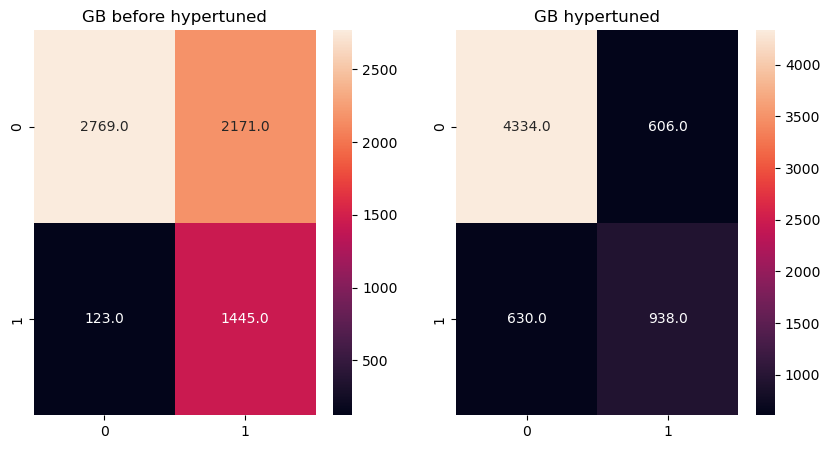

In [108]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt = '.1f')
plt.title("GB before hypertuned")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_gs), annot= True, fmt = '.1f')
plt.title("GB hypertuned")

In [109]:
# random forest hypertune

param_grid = {
    
    'max_depth' : list(range(5,20)),
    'n_estimators' : list(range(350,550,20)),
    'oob_score': [True, False],
    'max_features' : list(range(5,20)),
    'criterion' : ["gini", "entropy"],
    'min_weight_fraction_leaf' : np.logspace(0,-20, num=100)
    
}

In [110]:
# rf_clf1 = RandomForestClassifier(random_state= 42)

In [111]:
# scoring = {"AUC": "roc_auc"}
# rf_random = RandomizedSearchCV(rf_clf1,param_grid,cv = cv_method, n_jobs=-1,scoring= scoring, refit= 'AUC')

In [113]:
# rf_random.fit(X_train, y_train)

NameError: name 'rf_random' is not defined

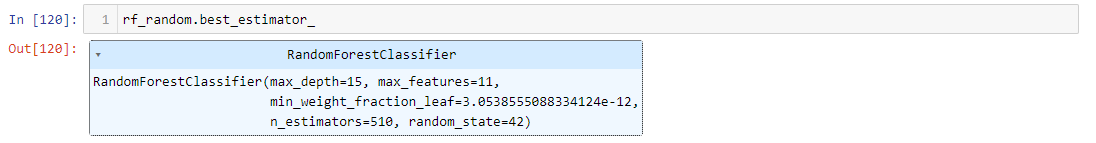

In [ ]:
# rf_random.best_estimator_

In [114]:
rf_clf2 = RandomForestClassifier(max_depth=15, max_features=20,
                       min_weight_fraction_leaf=3.0538555088334124e-12,
                       n_estimators=510, random_state=42,oob_score= True)

In [115]:
rf_clf2.fit(X_test,y_test)

RandomForestClassifier(max_depth=15, max_features=20,
                       min_weight_fraction_leaf=3.0538555088334124e-12,
                       n_estimators=510, oob_score=True, random_state=42)

In [116]:
y_pred_rf = rf_clf2.predict(X_test)
y_pred= rf_clf.predict(X_test)

In [117]:
print('Random Forest before tunning')
print("=="*30)
print(classification_report(y_test, y_pred))
print(f"f1 score {f1_score(y_test, y_pred)}")
print("=="*30)
print('Random Forest after tunning')
print("=="*30)
print(classification_report(y_test, y_pred_rf))
print(f"f1 score {f1_score(y_test, y_pred_rf)}")
print("=="*30)

Random Forest before tunning
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4940
           1       0.61      0.52      0.56      1568

    accuracy                           0.80      6508
   macro avg       0.73      0.71      0.72      6508
weighted avg       0.80      0.80      0.80      6508

f1 score 0.5633802816901409
Random Forest after tunning
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      4940
           1       0.93      0.83      0.88      1568

    accuracy                           0.94      6508
   macro avg       0.94      0.91      0.92      6508
weighted avg       0.94      0.94      0.94      6508

f1 score 0.8786244099797708


Text(0.5, 1.0, 'RF hypertuned')

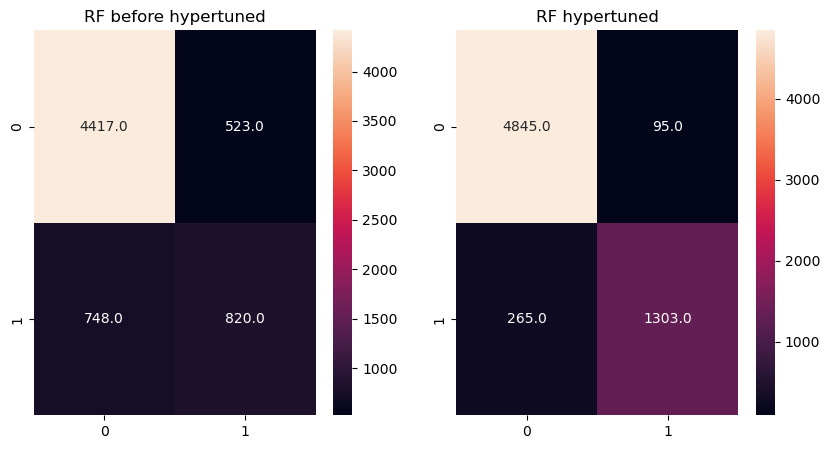

In [118]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt = '.1f')
plt.title("RF before hypertuned")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot= True, fmt = '.1f')
plt.title("RF hypertuned")